In [55]:
import numpy as np
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
import scipy.stats as stats
%matplotlib inline

In [2]:
# Project 1

In [56]:
df=pd.read_csv('Wholesale+Customers+Data.csv')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [57]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [59]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [60]:
#1.1.1 Use methods of descriptive statistics to summarize data. 



In [61]:
#1.1.1 Use methods of descriptive statistics to summarize data. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [62]:
# 1.1.2 Which Region and which Channel spent the most? 
#1.1.3 Which Region and which Channel spent the least?

df2=df.copy()

df2['Sum'] = df2['Fresh']+df2['Milk']+df2['Grocery']+df['Frozen']+df['Detergents_Paper']+df2['Delicatessen']
df2

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: Sum, dtype: int64



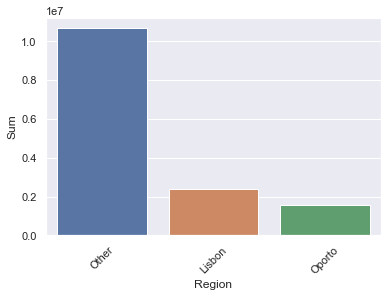

In [65]:

Summary = df2.groupby('Region')['Sum'].sum().sort_values(ascending=False).head()

print (Summary)
print ("")

x=df2.groupby('Region').agg({'Sum':sum}).sort_values(by="Sum",ascending=False)
z=x.reset_index()
sns.barplot(x='Region',y='Sum',data =z,ci=False)
plt.xticks(rotation=45);

Channel
Hotel     7999569
Retail    6619931
Name: Sum, dtype: int64



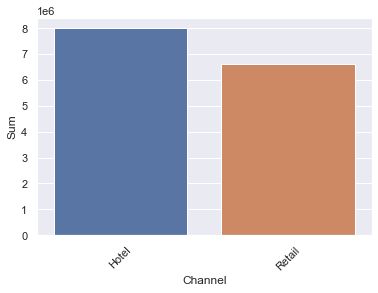

In [66]:
Summary = df2.groupby('Channel')['Sum'].sum().sort_values(ascending=False).head()

print (Summary)
print ("")

x=df2.groupby('Channel').agg({'Sum':sum}).sort_values(by="Sum",ascending=False)
z=x.reset_index()
sns.barplot(x='Channel',y='Sum',data =z,ci=False)
plt.xticks(rotation=45);

In [ ]:
      # Answer (1.1.2) - Highest spend in the Region is from Others and Highest spend in the Channel is from Hotel 
      # Answer (1.1.3) - The lowest spend in the region is from Oportoand and lowest spend in the Channel is from Retail.

In [1]:
#1.2 There are 6 different varieties of items that are considered. 
# Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
Fresh = np.std(df['Fresh']) / np.mean(df['Fresh'])
print ('The coeffiecent of Variation for the Fresh item is', Fresh)

print ()

Milk= np.std(df['Milk']) / np.mean(df['Milk'])
print ('The coeffiecent of Variation for the Milk item is', Milk)

print ()

Grocery= np.std(df['Grocery']) / np.mean(df['Grocery'])
print ('The coeffiecent of Variation for the Grocery item is', Grocery)

print ()

Frozen= np.std(df['Frozen']) / np.mean(df['Frozen'])
print ('The coeffiecent of Variation for the Frozen item is', Frozen)

print ()

Detergents_Paper = np.std(df['Detergents_Paper']) / np.mean(df['Detergents_Paper'])
print ('The coeffiecent of Variation for the Detergents_Paper item is', Detergents_Paper)

print ()

Delicatessen = np.std(df['Delicatessen']) / np.mean(df['Delicatessen'])
print ('The coeffiecent of Variation for the Delicatessen item is', Delicatessen)

The coeffiecent of Variation for the Fresh item is 1.0527196084948245

The coeffiecent of Variation for the Milk item is 1.2718508307424503

The coeffiecent of Variation for the Grocery item is 1.193815447749267

The coeffiecent of Variation for the Frozen item is 1.5785355298607762

The coeffiecent of Variation for the Detergents_Paper item is 1.6527657881041729

The coeffiecent of Variation for the Delicatessen item is 1.8473041039189306


Text(0.5, 1.0, 'Item - Fresh')

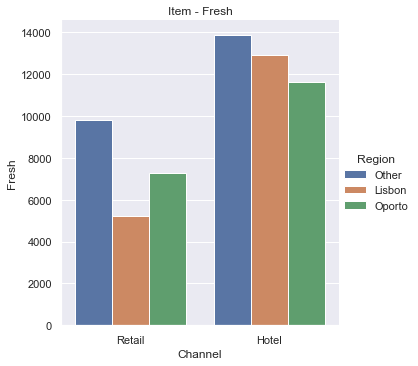

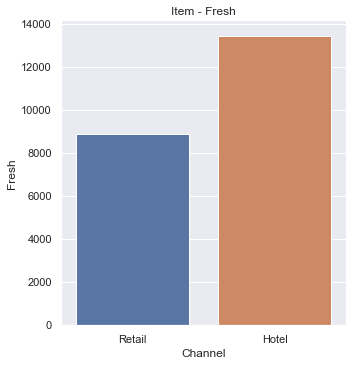

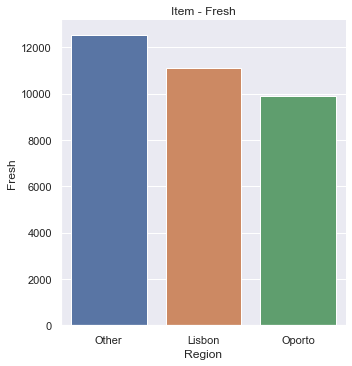

In [68]:
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

In [55]:
  # Summary of Fresh  - Based on the plot, Fresh item is sold more in hotel channel , on regional level it has low numbers for oporto as compare to Lisbon and other region.

Text(0.5, 1.0, 'Item - Milk')

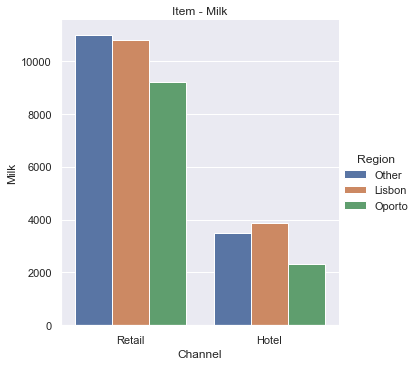

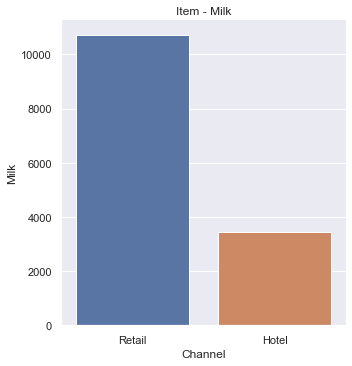

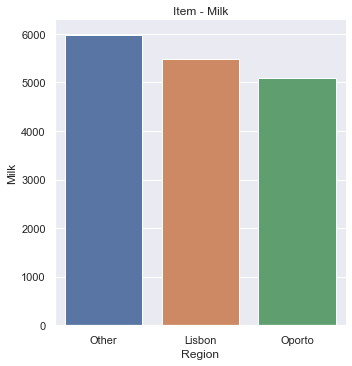

In [69]:
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Milk')

sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=df)
plt.title('Item - Milk')

sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=df)
plt.title('Item - Milk')

In [56]:
  # Summary of Milk  - Based on the plot, Milk item is sold more in Retail channel , on a regional level it has low numbers for oporto as compare to Lisbon and other region.

Text(0.5, 1.0, 'Item - Grocery')

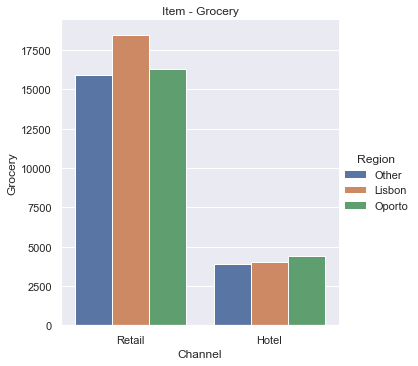

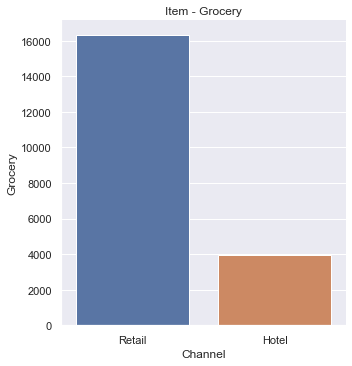

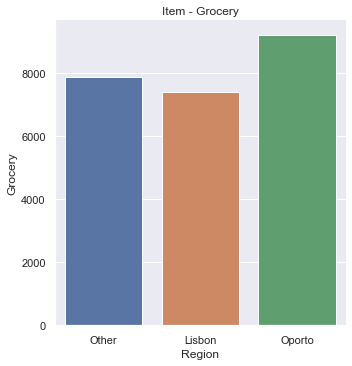

In [70]:
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Grocery')

sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=df)
plt.title('Item - Grocery')

sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=df)
plt.title('Item - Grocery')

In [ ]:
  # Summary of Grocery  -Based on the plot, Grocery item is sold more in Retail channel , on regional level it has low numbers for Lisbon as compare to oporto and other region.

Text(0.5, 1.0, 'Item - Frozen')

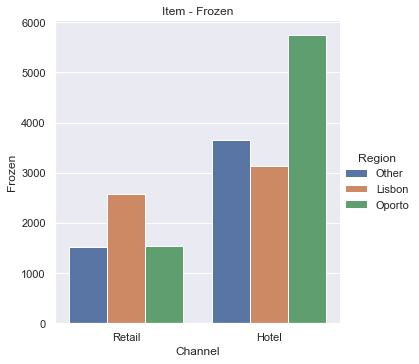

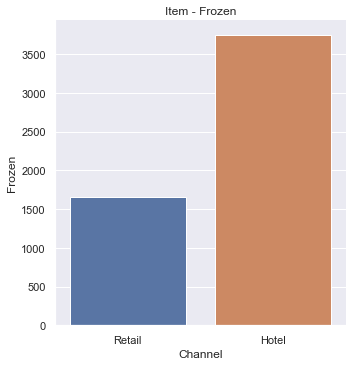

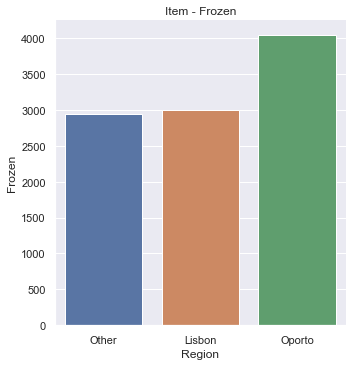

In [71]:
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Frozen')

sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=df)
plt.title('Item - Frozen')

sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=df)
plt.title('Item - Frozen')

In [ ]:
  # Summary of Frozen  - Based on the plot, Frozen item is sold more in Hotel channel , on regional level it has low numbers for other region as compare to oporto and Lisbon region.

Text(0.5, 1.0, 'Item - Detergents_Paper')

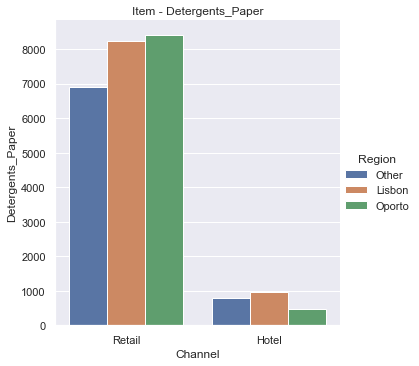

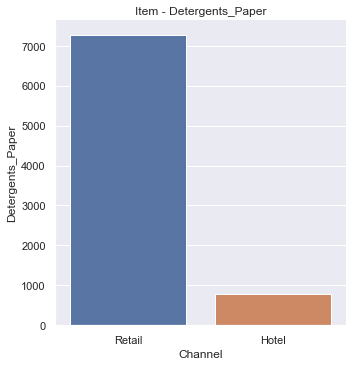

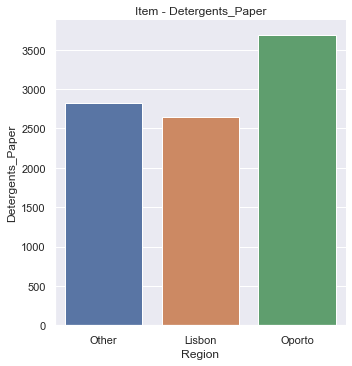

In [72]:
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Detergents_Paper')

sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=df)
plt.title('Item - Detergents_Paper')

sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=df)
plt.title('Item - Detergents_Paper')

In [ ]:
  # Summary of Detergents_Paper  - Based on the plot, Detergents_Paper item is sold more in Retail channel , on regional level it has low numbers for Lisbon as compare to oporto and other region.

Text(0.5, 1.0, 'Item - Delicatessen')

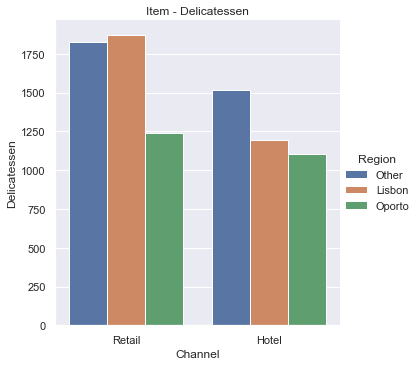

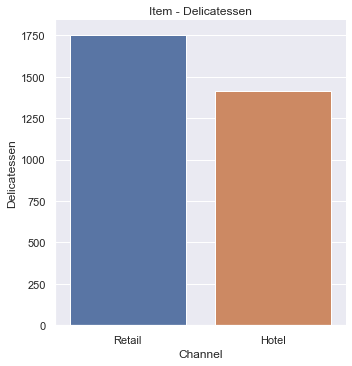

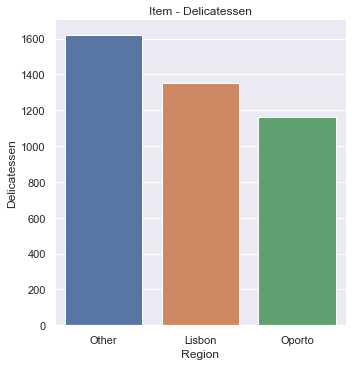

In [73]:
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Delicatessen')

sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=df)
plt.title('Item - Delicatessen')

sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=df)
plt.title('Item - Delicatessen')

In [ ]:
  # Summary of Delicatessen - Based on the plot, Delicatessen item is sold more in Retail channel , on a regional level it has low numbers for oporto as compare to Lisbon and other region.

In [ ]:
# Upon plotting the Coefficient of variable across all the regions it is evident that all the Food Products does not behave similarly across all the regions.

•	It can be seen that in region  Lisbon  the product Detergent Paper has maximum Coefficient of variable so it is highly inconsistent in Lisbon followed by Grocery. Where as in Oporto Frozen products shows highest inconsistent behavior followed by Detergent Paper. On the Other hand in the Region Other Delicatessen shows the highest inconsistency followed by Detergent Paper.

•	In the region Lisbon the product Delicatessen has the least Coefficient of Variable so it is the Most consistent product in Lisbon where as in Oporto Fresh and Delicatessan are most consistent. On the other hand in Other region only Fresh is most consistent.
# Upon plotting the Coefficient of variable across the two channels it is evident that all the Food Products does not behave similarly across all the regions.

•	It can be seen that in channel Hotel  the product Delicatessen has maximum Coefficient of variable so it is highly inconsistent in Hotel followed by Frozen. On the Other hand in the channel Retail  Detergent Paper shows the highest inconsistency followed by Milk.

•	In the channel Hotel the product Detergent Paper has the least Coefficient of Variable so it is the Most consistent product in Hotel Channel where as in Retail  Frozen products are most consistent. 


On the basis of above analysis it can be concluded that considering all the 6 variety of items ,all varieties do not show similar behavior across Region and Channel



In [ ]:
#1.3 On the basis of a descriptive measure of variability, 
# which item shows the most inconsistent behaviour? Which items show the least inconsistent behavio

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [75]:
Fresh = np.std(df['Fresh']) / np.mean(df['Fresh'])
print ('The coeffiecent of Variation for the Fresh item is', Fresh)

print ()

Milk= np.std(df['Milk']) / np.mean(df['Milk'])
print ('The coeffiecent of Variation for the Milk item is', Milk)

print ()

Grocery= np.std(df['Grocery']) / np.mean(df['Grocery'])
print ('The coeffiecent of Variation for the Grocery item is', Grocery)

print ()

Frozen= np.std(df['Frozen']) / np.mean(df['Frozen'])
print ('The coeffiecent of Variation for the Frozen item is', Frozen)

print ()

Detergents_Paper = np.std(df['Detergents_Paper']) / np.mean(df['Detergents_Paper'])
print ('The coeffiecent of Variation for the Detergents_Paper item is', Detergents_Paper)

print ()

Delicatessen = np.std(df['Delicatessen']) / np.mean(df['Delicatessen'])
print ('The coeffiecent of Variation for the Delicatessen item is', Delicatessen)


The coeffiecent of Variation for the Fresh item is 1.0527196084948245

The coeffiecent of Variation for the Milk item is 1.2718508307424503

The coeffiecent of Variation for the Grocery item is 1.193815447749267

The coeffiecent of Variation for the Frozen item is 1.5785355298607762

The coeffiecent of Variation for the Detergents_Paper item is 1.6527657881041729

The coeffiecent of Variation for the Delicatessen item is 1.8473041039189306


In [ ]:
 # Summary - Fresh item have lowest coefficient of Variation therefore it's consistent. And Delicatessen” item have highest coefficient of Variation, So that is Inconsisten



In [ ]:
# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

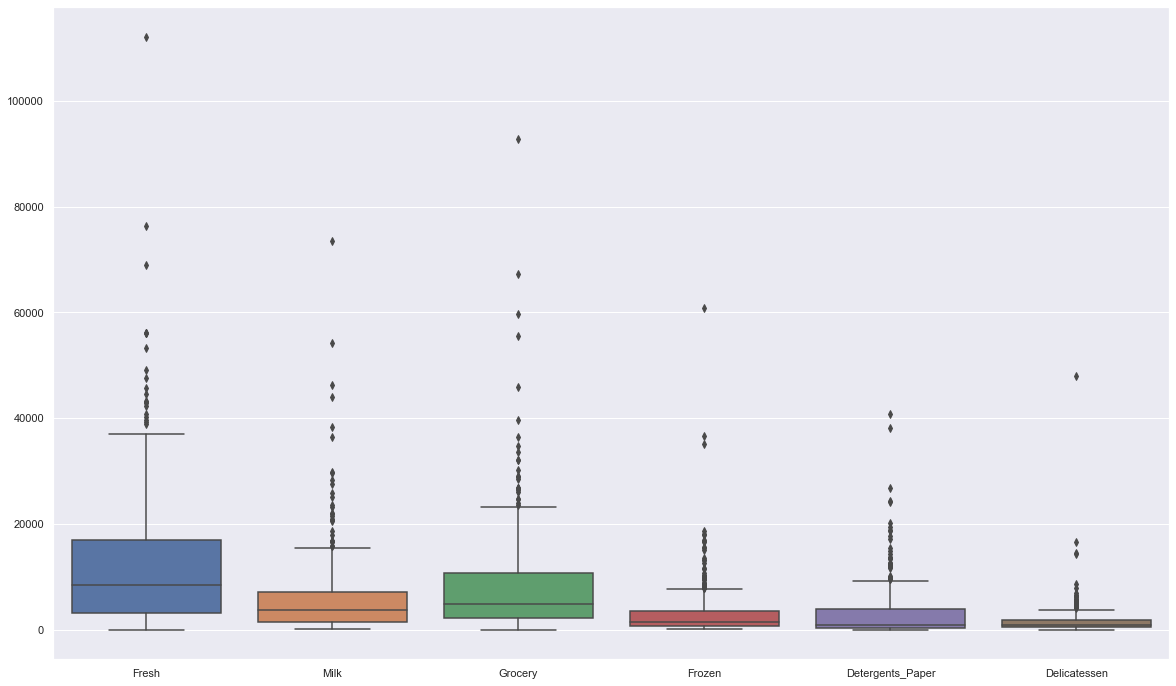

In [76]:
plt.figure(figsize=(20,12))
df3=df.copy()
df3.drop('Buyer/Spender',axis=1,inplace=True)
sns.boxplot(data=df3)


<AxesSubplot:>

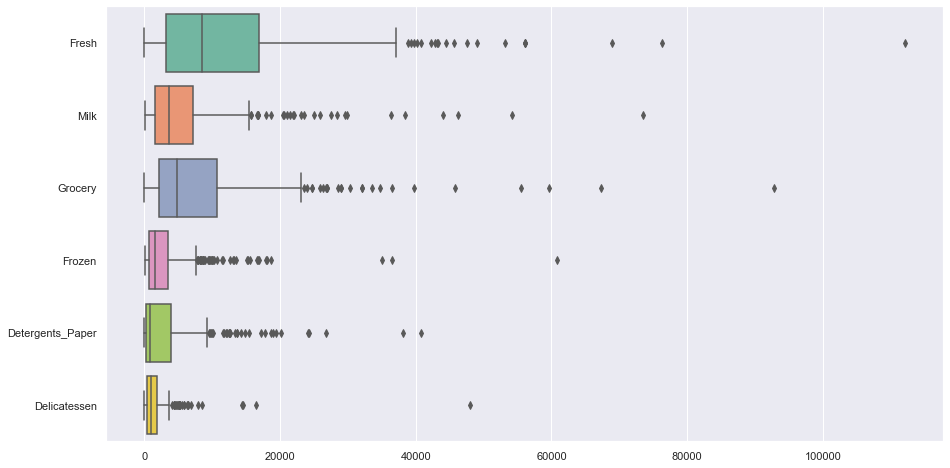

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df3, orient="h", palette="Set2")

In [ ]:
      # Summary - Refrence to above boxplot visvals, There is Outliers in all the Variales across the product range. Outliers are detected but not necessarily removed, it depends of the situation

In [ ]:
#1.5 On the basis of your analysis, 
#what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective


# On the basis of the analysis the following recommendations can be made :

•	On the basis of the analysis, it can be seen that the region  Other  and the channel Retail have Higher spending than other Channel and Regions. Hence From the Business prospective if a new business is to be opened it Should be opened in the Other region with Channel  Retail as the Other region is absorbing maximum amount of sells and this can boast up the Revenue compared to opening a new business in Lisbon or Oporto and with the Channel Hotel.

•	In all the regions the Food Items Fresh has the highest spending followed by Grocery and  Milk.  Hence these food products are strongly recommended to be available simultaneously at all the businesses with priority of availability being Fresh food products.

•	Also the food item  Delicatessen  shows least inconsistent behavior across all regions and channels which should be minimized. So Delicatessen is also recommended to be available at all times in all the Businesses .



In [ ]:
# Project 2
# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduate

In [77]:
su=pd.read_csv('Survey-1.csv')
su

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [78]:
su.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [20]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [7]:
su.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [ ]:
# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [ ]:
# 2.1.1. Gender and Major

In [9]:
pd.crosstab(su['Gender'],su['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [ ]:
# 2.1.2. Gender and Grad Intention

In [10]:
pd.crosstab(su['Gender'],su['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [ ]:
# 2.1.3. Gender and Employment

In [11]:
pd.crosstab(su['Gender'],su['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [ ]:
# 2.1.4. Gender and Computer

In [12]:
pd.crosstab(su['Gender'],su['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [ ]:
# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [ ]:
# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [15]:
su['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [2]:
# Total Number of Students 62 , Total numbers of Male out of 62 is 29
x=62
z=29
print (x)
     

print ('The probability that a randomly selected CMSU student will be male is',z/x)

62
The probability that a randomly selected CMSU student will be male is 0.46774193548387094


In [3]:

# Total No of Students = 62 (62/100 = 0.62)
# Total No of Male = 29
# Probability a randomly selected student will be male = Total No of Male (29) / Average of total number of Students (0.62)
# Hence from the calculations done in Python we conclude that :




In [ ]:
# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [42]:
su['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [4]:
# Total Number of Students 62 , Total numbers of female out of 62 is 33
x=62
z=33
print (x)
# the avarage value of total number of Students is 0.62 (X) 

print ('The probability that a randomly selected CMSU student will be male is',z/x)

62
The probability that a randomly selected CMSU student will be male is 0.532258064516129


In [ ]:
# Total No of Students = 62
# Total No of Female = 33
# Probability a randomly selected student will be Female = Total No of Female (33) / Average of total number of Students (0.62)
# Hence from the calculations done in Python we conclude that :

# The probability that a randomly selected CMSU student will be male is 0.532258064516129, 53.22 %

In [ ]:
# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [ ]:
# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [21]:
pd.crosstab(su['Gender'],su['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [29]:
print ('Probability of  Accounting among the male student', 4/29)
print ('Probability of  CIS among  the male students',1 / 29)
print ('Probability of  Economics/Finance among  the male students', 4 /29)
print ('Probability of  International Business among the male students', 2/29)
print ('Probability of  Management among  the male students Management', 6/29)
print ('Probability of  Other among  the male students Other', 4/29)
print ('Probability of  Retailing/Marketing among the male students', 5/29)
print ('Probability of  Undecided among  the male students', 3/29)

Probability of  Accounting among the male student 0.13793103448275862
Probability of  CIS among  the male students 0.034482758620689655
Probability of  Economics/Finance among  the male students 0.13793103448275862
Probability of  International Business among the male students 0.06896551724137931
Probability of  Management among  the male students Management 0.20689655172413793
Probability of  Other among  the male students Other 0.13793103448275862
Probability of  Retailing/Marketing among the male students 0.1724137931034483
Probability of  Undecided among  the male students 0.10344827586206896


In [ ]:


# Hence from the calculations done in Python we conclude that :

# The Probability of  Accounting among  the male students is 13.79% (4/29)

# The Probability of  CIS among  the male students is 3.45% (1/29)

# The Probability of  Economics/Finance among  the male students 13.79% (4/29)

# The Probability of  International Business among  the male students 6.9% (2/29)

# The Probability of  Management among  the male students Management is 20.69% (6/29)

# The Probability of  Other among  the male students Other 13.79% (4/29)

# The Probability of  Retailing/Marketing among  the male students 17.24% (5/29)

# The Probability of  Undecided among the male students  10.34% (3/29)


In [ ]:
# 2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [10]:
pd.crosstab(su['Gender'],su['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [20]:
print ('Probability of  Accounting among the female students', 3/33)
print ('Probability of  CIS among  the female students',3/33)
print ('Probability of  Economics/Finance among  the female students', 7/33)
print ('Probability of  International Business among the female students',4/33)
print ('Probability of  Management among  the female students Management',4/33)
print ('Probability of  Other among  the female students Other', 3/33)
print ('Probability of  Retailing/Marketing among the female students', 9/33)
print ('Probability of  Undecided among  the female students', 0/33)

Probability of  Accounting among the female students 0.09090909090909091
Probability of  CIS among  the female students 0.09090909090909091
Probability of  Economics/Finance among  the female students 0.21212121212121213
Probability of  International Business among the female students 0.12121212121212122
Probability of  Management among  the female students Management 0.12121212121212122
Probability of  Other among  the female students Other 0.09090909090909091
Probability of  Retailing/Marketing among the female students 0.2727272727272727
Probability of  Undecided among  the female students 0.0


In [ ]:

# Hence from the calculations done in Python we conclude that :


# The Probability of  Accounting among  the female students is 9.09% (3/33)

# The Probability of  CIS among  the female students is 9.09% (3/33)

# The Probability of  Economics/Finance among  the female students 21.21% (7/33)

# The Probability of  International Business among  the female students 12.12% (4/33)

# The Probability of  Management among  the female students Management is 12.12% (4/33)

# The Probability of  Other among  the female students Other 9.09% (3/33)

# The Probability of  Retailing/Marketing among  the female students 27.27% (9/33)

# The Probability of  Undecided among the female students  0% (0/33)



In [ ]:
# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question

In [ ]:
# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [7]:
pd.crosstab(su['Gender'],su['Grad Intention'])


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [6]:
# Probability that a randomly chosen student is a Male = 29/62
# Probability of Male that intends to Gradruate  = 17/29

print ('Therefore The probability That a randomly chosen student is a male and intends to graduate is', 17/62)

# Therefore The probability That a randomly chosen student is a male and intends to graduate is 0.27419354838709675


Therefore The probability That a randomly chosen student is a male and intends to graduate is 0.27419354838709675


In [ ]:
# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [32]:
pd.crosstab(su['Gender'],su['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [7]:
# Probability that a randomly chosen student is a Female  = 33/62
# Probability of Female with No Laptop =  4/62
x1=62
y1=4

print ('The probability that a randomly selected student is a female and does NOT have a laptop is',y1/x1)

# Hence from the calculations done in Python we conclude that :

# The probability that a randomly selected student is a female and does NOT have a laptop is 0.06451612903225806

The probability that a randomly selected student is a female and does NOT have a laptop is 0.06451612903225806


In [ ]:
# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [8]:
# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [49]:
pd.crosstab(su['Gender'],su['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [16]:
#Probability of a Student being  Male = 29/62
#Probability of a student having FullTime Employment = 10/62
#Probability of a Male having FullTime Employment = 7/62
a1 =29/62
b1=10/62
c1=7/62



# Probability that a randomly chosen student is either a male or has full-time employment = Probability of a Student being  Male + Probability of a student having FullTime Employment - Probability of a Male having FullTime Employment

print ('The probability that a randomly chosen student is either a male or has a full-time employment', a1+b1-c1)


The probability that a randomly chosen student is either a male or has a full-time employment 0.5161290322580645


In [ ]:
# Hence from the calculations done in Python we conclude that : 
# The probability that a randomly chosen student is either a male or has a full-time employment 0.5161290322580645

In [ ]:
# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [70]:
pd.crosstab(su['Gender'],su['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [125]:
# Probability of international business  given Female = 4/33
# Probability of management given Female = 4/33

d1 = 4/33
e1 = 4/33

#Probability of international business or management given Female = Probability of international business  given Female +  Probability of management given Female

print ('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is',d1+e1)



The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 0.24242424242424243


In [ ]:
# Hence from the calculations done in Python we conclude that :

# The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 24.242 %


In [ ]:
# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [85]:
pd.crosstab(su['Gender'],su[su['Grad Intention']!='Undecided']['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [12]:
# P(Grad Intention Yes) = 28/40
# P(Grad Intention Yes female) = 11/40

x= 28/40
print("Probability that a randomly selected candiate is female", x)
y = 11/40
print("Probability that a female candidate has Grad intention", y)


Probability that a randomly selected candiate is female 0.7
Probability that a female candidate has Grad intention 0.275


In [ ]:
# from the calculations done in Python we conclude that : These probabilities are not equal. This suggests that the two events are independent


In [ ]:
# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

In [ ]:
# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [21]:
print (pd.crosstab(su['Gender'],su['GPA']))

print ("")

GPA= su[su['GPA']<3]['GPA'].value_counts().sum()

print ('Numbers of Students has GPA less then 3 is', GPA)


print ("")

# total number students has GPA is 62, and out of 62 there are 17 Students which has GPA less then a 3.

print ('The probability of his/her GPA is less then 3 is',17/62)



GPA     2.3  2.4  2.5  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  \
Gender                                                                         
Female    1    1    2    0    1    3    5    2    4    3    2    4    1    2   
Male      0    0    4    2    2    1    2    5    2    2    5    2    2    0   

GPA     3.8  3.9  
Gender            
Female    1    1  
Male      0    0  

Numbers of Students has GPA less then 3 is 17

The probability of his/her GPA is less then 3 is 0.27419354838709675


In [ ]:

# Hence from the calculations done in Python we conclude that :

# If a student is chosen randomly, what is the probability that his/her GPA is less than 3 is 0.27419354838709675


In [ ]:
# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more

C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


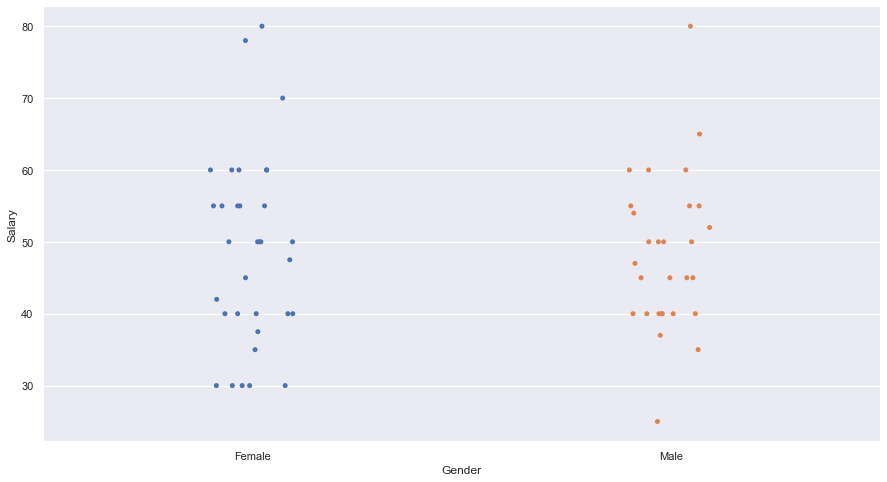

In [79]:
plt.figure(figsize=(15,8))
sns.stripplot(su['Gender'],su['Salary'], jitter=True);

In [22]:
print (pd.crosstab(su['Gender'],su['Salary']))

print ("")

print ('Number of male earns 50 or more is', 14)


print ("")

# total number Male is 29, and out of 29 there are 14 males who earn 50 or more

print ('probability that a randomly selected male earns 50 or more is',14/29)

print ("")

print ('Number of Female earns 50 or more is', 18)


print ("")

# total number Female is 33, and out of 33 there are 18 females who earn 50 or more

print ('probability that a randomly selected Female earns 50 or more is',18/33)


Salary  25.0  30.0  35.0  37.0  37.5  40.0  42.0  45.0  47.0  47.5  50.0  \
Gender                                                                     
Female     0     5     1     0     1     5     1     1     0     1     5   
Male       1     0     1     1     0     7     0     4     1     0     4   

Salary  52.0  54.0  55.0  60.0  65.0  70.0  78.0  80.0  
Gender                                                  
Female     0     0     5     5     0     1     1     1  
Male       1     1     3     3     1     0     0     1  

Number of male earns 50 or more is 14

probability that a randomly selected male earns 50 or more is 0.4827586206896552

Number of Female earns 50 or more is 18

probability that a randomly selected Female earns 50 or more is 0.5454545454545454


In [ ]:
# Hence from the calculations done in Python we conclude that :

# The Conditional probability that a randomly selected Male earns 50 or more is 0.4827586206896552
# The Conditional probability that a randomly selected Female earns 50 or more is 0.5454545454545454

In [ ]:
# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions

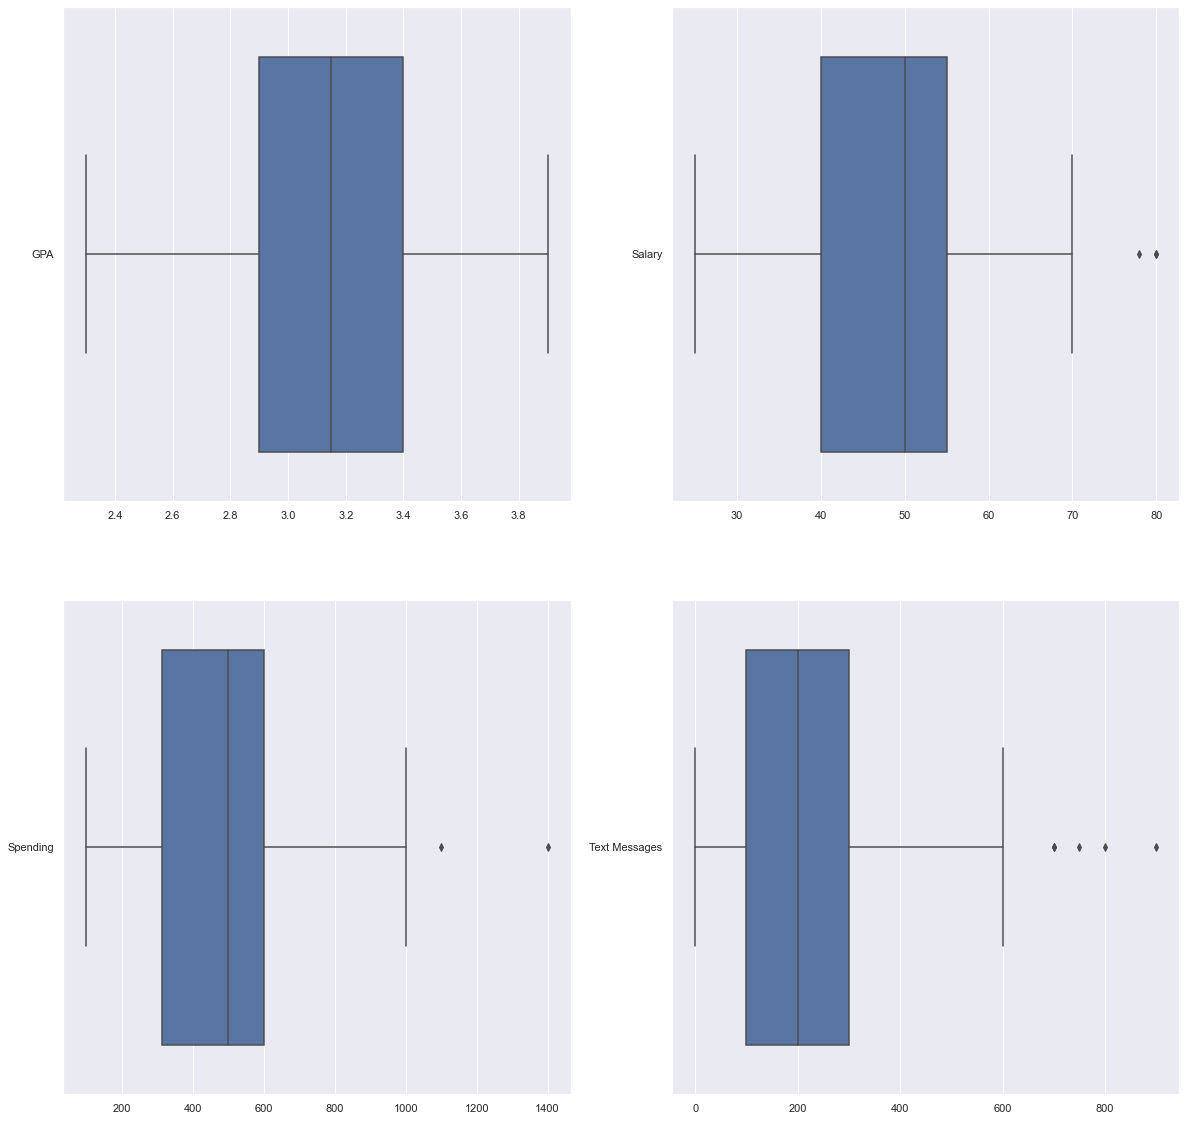

In [71]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 20)

a=sns.boxplot(data=su[['GPA']] ,
                orient = "h",ax=axes[0][0])


b=sns.boxplot(data=su[['Salary']] ,
                orient = "h",ax=axes[0][1])


c=sns.boxplot(data=su[['Spending']] ,
                orient = "h",ax=axes[1][0])


d=sns.boxplot(data=su[['Text Messages']] ,
                orient = "h",ax=axes[1][1])

plt.show()

In [ ]:
# From the above boxplot for the continuous variables GPA, Salary, Spending and Text Messages we can see that :
# •	GPA is almost Normally Distributed with a slight skewness toward the left.
# •	Salary is also Normally Distributed with a slight skewness towards the right.
# •	Spending is not Normally distributed and highly Right Skewed
# •	Text message is not Normally distributed and highly Right Skewed

# By these details we confirm that out of the given four data sets ‘GPA’ and ‘Salary’ are following normal distribution whereas other two ‘Spending’ and ‘Text Messages’ are not following the normal distribution


In [ ]:
# 2.8.2 Write a note summarizing your conclusions


In [ ]:
# Project 3 
# An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [33]:
ab=pd.read_csv('A+&+B+shingles.csv')
ab

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [34]:
ab.columns

Index(['A', 'B'], dtype='object')

In [35]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [36]:
ab.isnull().sum()


A    0
B    5
dtype: int64

In [37]:
ab.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [ ]:
# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [38]:
from scipy import stats
from scipy.stats import ttest_1samp

# for A Shingle

# HO=> mu<=0.35 
# Ha=> mu>=0.35   
# since the a value is not given, therefor we will be considering 0.05 as a value considaring globle standered

t_statistic, p_value=ttest_1samp(ab.A, 0.35)
print("One sample t test \nt statistic: {0} p value: {1}".format(t_statistic, p_value/2))

# One sample ttest , t statistic : 1.4735046253382782 , and p vlue : 0.07477633144907513

# The Level of significance is 0.05 and the p value is 0.074776 and its in higher side of level of significance. So, the based on the statistically the test is failing to reject the bull hypothesis at 5% levl of significance.


# Hence, at 95% confidence level, and based on sufficient evidence we can concude that the content in A Shingles is more than 0.35 pound per 100 square feet.

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513


In [39]:
# for B Shingle

# HO=> mu<=0.35 
# Ha=> mu>=0.35

# since the a value is not given, therefor we will be considering 0.05 as a value considaring globle standered
# The Sample size (n) for this case would be 31, 
t_statistic, p_value = ttest_1samp(ab.B, 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

# One sample ttest , t statistic :-3.1003313069986995 , and the p value: 0.0020904774003191826
# The Level of significance is 0.05 and the p value: 0.00209 and it's less than 5% of Level of significance. So, the based on the statistically the test is reject the bull hypothesis at 5% level of significance.


# Hence, at 95% confidence level, based on sufficient evidence we can concude that the content in B Shingles is less than 0.35 pound per 100 square feet.

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [ ]:
# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [54]:
from scipy.stats import ttest_ind

#H0 : μ(A)= μ(B)
#Ha : μ(A)!= μ(B)
#α = 0.05

# since the a value is not given, therefor we will be considering 0.05 as a value considaring globle standered

tstat,pvalue =stats.ttest_ind( ab[ "A"],ab[ "B"].dropna())
pvalue

# With the independed Sample ttest resulte we got p value: 0.2017496571835328 and its in higher side of level of significance. So, the based on the statistically the test is failing to reject the bull hypothesis at 5% levl of significance.

# Hence, at 95% confidence level, and based on sufficient evidence we can concude that the content in A Shingles is equal to mean moisture content in B

0.2017496571835328